In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from keras.layers import Input
from keras.models import Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Activation, Dense, LSTM, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
import tensorflow as tf
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import sklearn.ensemble as ske

In [2]:
df_train = pd.read_csv("C:/Users/Raghav/Desktop/KDDTrain+.csv")
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
df_test = pd.read_csv("C:/Users/Raghav/Desktop/KDDTest+.csv")
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [4]:
len(df_train.attack.unique())

23

In [5]:
len(df_test.attack.unique())

38

In [6]:
df_train.groupby(['protocol_type']).size()

protocol_type
icmp      8291
tcp     102689
udp      14993
dtype: int64

In [7]:
df_test.groupby(['protocol_type']).size()

protocol_type
icmp     1043
tcp     18880
udp      2621
dtype: int64

In [8]:
df_train.groupby(['service']).size()

service
IRC          187
X11           73
Z39_50       862
aol            2
auth         955
            ... 
urp_i        602
uucp         780
uucp_path    689
vmnet        617
whois        693
Length: 70, dtype: int64

In [9]:
df_test.groupby(['service']).size()

service
IRC          13
X11          15
Z39_50       45
auth         67
bgp          46
             ..
urp_i        23
uucp         50
uucp_path    46
vmnet        43
whois        40
Length: 64, dtype: int64

In [10]:
df_train.groupby(['flag']).size()

flag
OTH          46
REJ       11233
RSTO       1562
RSTOS0      103
RSTR       2421
S0        34851
S1          365
S2          127
S3           49
SF        74945
SH          271
dtype: int64

In [11]:
df_test.groupby(['flag']).size()

flag
OTH           4
REJ        3850
RSTO        773
RSTOS0        2
RSTR        669
S0         2013
S1           21
S2           15
S3          249
SF        14875
SH           73
dtype: int64

In [12]:
df_train.groupby(["attack"]).size()

attack
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [13]:
df_test.groupby(["attack"]).size()

attack
apache2             737
back                359
buffer_overflow      20
ftp_write             3
guess_passwd       1231
httptunnel          133
imap                  1
ipsweep             141
land                  7
loadmodule            2
mailbomb            293
mscan               996
multihop             18
named                17
neptune            4657
nmap                 73
normal             9711
perl                  2
phf                   2
pod                  41
portsweep           157
processtable        685
ps                   15
rootkit              13
saint               319
satan               735
sendmail             14
smurf               665
snmpgetattack       178
snmpguess           331
sqlattack             2
teardrop             12
udpstorm              2
warezmaster         944
worm                  2
xlock                 9
xsnoop                4
xterm                13
dtype: int64

In [14]:
np.sort(df_train['attack'].unique())

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

In [15]:
np.sort(df_test['attack'].unique())

array(['apache2', 'back', 'buffer_overflow', 'ftp_write', 'guess_passwd',
       'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb',
       'mscan', 'multihop', 'named', 'neptune', 'nmap', 'normal', 'perl',
       'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit',
       'saint', 'satan', 'sendmail', 'smurf', 'snmpgetattack',
       'snmpguess', 'sqlattack', 'teardrop', 'udpstorm', 'warezmaster',
       'worm', 'xlock', 'xsnoop', 'xterm'], dtype=object)

In [16]:
len(np.union1d(df_train['attack'].unique(), df_test['attack'].unique()))

40

In [17]:
len(np.intersect1d(df_train['service'], df_test['service']))

64

**Preprocessing**

In [18]:
# There are mainly 5 classes :- dos, u2r, r2l, probe, normal
# Multiclass Classification is performed

categories = {'apache2': 'dos', 'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 
              'httptunnel': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'mailbomb': 'dos',
              'mscan': 'probe', 'multihop': 'r2l', 'named': 'r2l' , 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 
              'pod': 'dos', 'portsweep': 'probe', 'processtable': 'dos', 'ps': 'u2r', 'rootkit': 'u2r', 'saint': 'probe', 'satan': 'probe', 
              'sendmail': 'r2l', 'smurf': 'dos', 'snmpgetattack': 'r2l', 'snmpguess': 'r2l', 'sqlattack': 'u2r', 'spy': 'r2l', 
              'teardrop': 'dos', 'udpstorm': 'dos','warezclient': 'r2l', 'warezmaster': 'r2l', 'worm': 'dos', 'xlock': 'r2l','xsnoop': 'r2l',
              'xterm': 'u2r','normal': 'normal'}
len(categories)

40

In [19]:
df_train['attack'].replace(categories, inplace=True)
df_train.groupby(['attack']).size()

attack
dos       45927
normal    67343
probe     11656
r2l         995
u2r          52
dtype: int64

In [20]:
df_test['attack'].replace(categories, inplace=True)
df_test.groupby(['attack']).size()

attack
dos       7460
normal    9711
probe     2421
r2l       2885
u2r         67
dtype: int64

In [21]:
df_train.drop('level', axis = 1, inplace = True)

In [22]:
df_test.drop('level', axis = 1, inplace = True)

In [23]:
dictionary_protocol_type = {}
dictionary_service = {}
dictionary_flag = {}

k=0
for val in np.sort(df_train['protocol_type'].unique()):
  dictionary_protocol_type[val] = k
  k+=1

k=0
for val in np.sort(df_train['service'].unique()):
  dictionary_service[val] = k
  k+=1

k=0
for val in np.sort(df_train['flag'].unique()):
  dictionary_flag[val] = k
  k+=1

dictionary_flag

{'OTH': 0,
 'REJ': 1,
 'RSTO': 2,
 'RSTOS0': 3,
 'RSTR': 4,
 'S0': 5,
 'S1': 6,
 'S2': 7,
 'S3': 8,
 'SF': 9,
 'SH': 10}

In [24]:
df_train['protocol_type'].replace(dictionary_protocol_type, inplace = True)
df_train['service'].replace(dictionary_service, inplace = True)
df_train['flag'].replace(dictionary_flag, inplace = True)

df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos
125969,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,1,54,9,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,1,30,5,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [25]:
df_test['protocol_type'].replace(dictionary_protocol_type, inplace = True)
df_test['service'].replace(dictionary_service, inplace = True)
df_test['flag'].replace(dictionary_flag, inplace = True)

df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,1,49,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos
1,0,1,49,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,dos
2,2,1,20,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,0,14,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,probe
4,1,1,60,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,1,24,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,dos
22542,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [26]:
numeric_col = df_train.select_dtypes(include='number').columns
numeric_col

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [27]:
# Applying test train split on the dataset

Xtrain = df_train.iloc[:,:-1]
Xtest =  df_test.iloc[:,:-1]
ytrain = df_train['attack']
ytest = df_test['attack'] 

In [28]:
Xtrain

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [29]:
print('Researching important feature based on %i total features\n' % Xtrain.shape[1])

# Feature selection using Trees Classifier
fsel = ske.ExtraTreesClassifier().fit(Xtrain.values, ytrain.values)
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(Xtrain.values)
nb_features = X_new.shape[1]

features = []

Researching important feature based on 41 total features



In [30]:
print('%i features identified as important:' % nb_features)

indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, df_train.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

# XXX : take care of the feature order
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(df_train.columns[2+f])

15 features identified as important:
1. feature srv_diff_host_rate (0.083358)
2. feature dst_bytes (0.077178)
3. feature rerror_rate (0.073097)
4. feature root_shell (0.067407)
5. feature dst_host_srv_rerror_rate (0.065401)
6. feature srv_rerror_rate (0.065142)
7. feature dst_host_rerror_rate (0.063553)
8. feature dst_host_same_src_port_rate (0.048154)
9. feature dst_host_diff_srv_rate (0.047600)
10. feature dst_host_serror_rate (0.043201)
11. feature flag (0.039502)
12. feature serror_rate (0.035379)
13. feature dst_host_srv_diff_host_rate (0.033693)
14. feature attack (0.032779)
15. feature dst_host_same_srv_rate (0.027265)


In [31]:
# Fitting the standard scaler fo normalizing the dataset
scaler=StandardScaler()
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

**Machine Learning Algorithms**

In [32]:
accuracy = []
precision = []
recall = []
f1 = []
model = []

Decision Tree Classifier : 75.762952 %


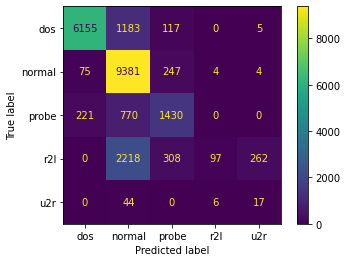

In [33]:
algorithm = DecisionTreeClassifier()
clf = algorithm.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
print("%s : %f %%" % ('Decision Tree Classifier', score*100))
warnings.filterwarnings('ignore')
plot_confusion_matrix(clf, Xtest, ytest) 

ypred = clf.predict(Xtest)

p = precision_score(ytest, ypred, average = 'micro')
r = recall_score(ytest, ypred, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('DecisionTree')
precision.append(p)
accuracy.append(score)
recall.append(r)
f1.append(f)

Random Forest Classifier : 75.288325 %


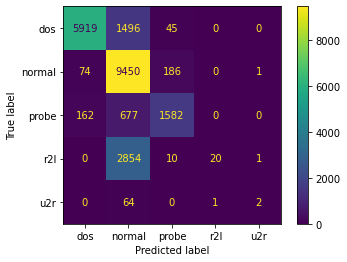

In [34]:
algorithm = RandomForestClassifier(n_estimators=150)
clf = algorithm.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
print("%s : %f %%" % ('Random Forest Classifier', score*100))
plot_confusion_matrix(clf, Xtest, ytest)  

ypred = clf.predict(Xtest)

p = precision_score(ytest, ypred, average = 'micro')
r = recall_score(ytest, ypred, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('RandomForest')
precision.append(p)
accuracy.append(score)
recall.append(r)
f1.append(f)

Gradient Boosting Classifier : 76.734386 %


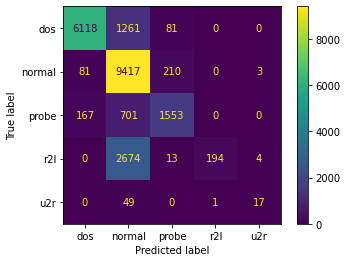

In [35]:
algorithm = GradientBoostingClassifier(n_estimators=100)
clf = algorithm.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
print("%s : %f %%" % ('Gradient Boosting Classifier', score*100))
plot_confusion_matrix(clf, Xtest, ytest)  

ypred = clf.predict(Xtest)

p = precision_score(ytest, ypred, average = 'micro')
r = recall_score(ytest, ypred, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('GradientBoosting')
precision.append(p)
accuracy.append(score)
recall.append(r)
f1.append(f)

Bernoulli Naive Bayes Classifier : 61.661639 %


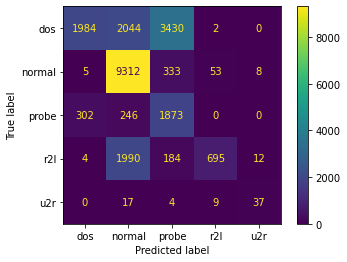

In [36]:
algorithm = BernoulliNB()
clf = algorithm.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
print("%s : %f %%" % ('Bernoulli Naive Bayes Classifier', score*100))
plot_confusion_matrix(clf, Xtest, ytest)

ypred = clf.predict(Xtest)

p = precision_score(ytest, ypred, average = 'micro')
r = recall_score(ytest, ypred, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('Naive Bayes')
precision.append(p)
accuracy.append(score)
recall.append(r)
f1.append(f)


Ensemble Classifier : 76.051278 %


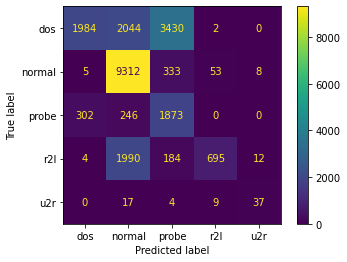

In [37]:
model_1 = XGBClassifier()
model_2 = DecisionTreeClassifier()
model_3 = svm.SVC(kernel = "rbf")
model_4 = KNeighborsClassifier(n_neighbors=11)
final_model = VotingClassifier(estimators=[('XGB',model_1),('DT', model_2), ('svm', model_3),('knn', model_4)], voting='hard')
final_model.fit(Xtrain,ytrain)
y_pred=final_model.predict(Xtest)
#confusion_matrix(ytest,y_pred)
score = final_model.score(Xtest, ytest)
print("%s : %f %%" % ('Ensemble Classifier', score*100))
#ensem_acc=accuracy_score(ytest,y_pred)
plot_confusion_matrix(clf, Xtest, ytest) 

ypred = final_model.predict(Xtest)

p = precision_score(ytest, ypred, average = 'micro')
r = recall_score(ytest, ypred, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('Ensemble Model')
precision.append(p)
accuracy.append(score)
recall.append(r)
f1.append(f)

In [38]:
dictionary_attacks = {
    'dos':1,
    'probe':2,
    'u2r':3,
    'r2l':4,
    'normal':5
}

dictionary_attacks

{'dos': 1, 'probe': 2, 'u2r': 3, 'r2l': 4, 'normal': 5}

Epoch 1/30
17/17 [==============================] - 2s 92ms/step - loss: 0.9332 - accuracy: 0.8501 - val_loss: 0.2331 - val_accuracy: 0.9530
Epoch 2/30
17/17 [==============================] - 1s 81ms/step - loss: 0.1519 - accuracy: 0.9626 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 3/30
17/17 [==============================] - 1s 81ms/step - loss: 0.0862 - accuracy: 0.9719 - val_loss: 0.0648 - val_accuracy: 0.9763
Epoch 4/30
17/17 [==============================] - 1s 83ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0454 - val_accuracy: 0.9863
Epoch 5/30
17/17 [==============================] - 1s 82ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0357 - val_accuracy: 0.9891
Epoch 6/30
17/17 [==============================] - 1s 82ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0336 - val_accuracy: 0.9906
Epoch 7/30
17/17 [==============================] - 1s 82ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0311 - val_accuracy: 0.9909
Epoch 8/30
17

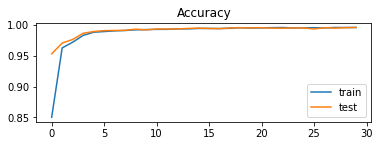

In [39]:
x_train = Xtrain
y_train = ytrain
x_test = Xtest
y_test = ytest

y_train.replace(dictionary_attacks, inplace = True)
y_test.replace(dictionary_attacks , inplace = True)

mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=1024, input_dim=x_train.shape[1], activation='relu'))

# adding a hidden layer with 256 neurons
mlp.add(Dense(units=256,activation='relu'))

# adding a hidden layer with 128 neurons
mlp.add(Dense(units=128,activation='relu'))

# adding a hidden layer with 128 neurons
mlp.add(Dense(units=128,activation='relu'))

# output layer with softmax activation
mlp.add(Dense(units=16,activation='softmax'))

# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model on training dataset
history = mlp.fit(x_train, y_train, epochs=30, batch_size=6000,validation_split=0.2)

# predicting target attribute on testing dataset
test_results = mlp.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

ypred = mlp.predict(Xtest)

# predict probabilities for test set
y_probs = mlp.predict(x_test, verbose=0)
# predict crisp classes for test set 
y_classes = np.argmax(y_probs,axis=1)

# reduce to 1d array
y_probs = y_probs[:, 0]


p = precision_score(ytest, y_classes, average = 'micro')
r = recall_score(ytest, y_classes, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('MLP')
precision.append(p)
accuracy.append(test_results[1])
recall.append(r)
f1.append(f)

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Epoch 1/30
17/17 [==============================] - 66s 4s/step - loss: 1.6143 - accuracy: 0.5917 - val_loss: 1.0006 - val_accuracy: 0.5412
Epoch 2/30
17/17 [==============================] - 61s 4s/step - loss: 1.1074 - accuracy: 0.5521 - val_loss: 1.0435 - val_accuracy: 0.6994
Epoch 3/30
17/17 [==============================] - 60s 4s/step - loss: 1.0123 - accuracy: 0.6579 - val_loss: 0.9126 - val_accuracy: 0.5863
Epoch 4/30
17/17 [==============================] - 63s 4s/step - loss: 0.8926 - accuracy: 0.6159 - val_loss: 0.7747 - val_accuracy: 0.6708
Epoch 5/30
17/17 [==============================] - 68s 4s/step - loss: 0.9017 - accuracy: 0.6997 - val_loss: 0.8518 - val_accuracy: 0.7891
Epoch 6/30
17/17 [==============================] - 63s 4s/step - loss: 0.8248 - accuracy: 0.7631 - val_loss: 0.7221 - val_accuracy: 0.7240
Epoch 7/30
17/17 [==============================] - 63s 4s/step - loss: 0.7299 - accuracy: 0.7775 - val_loss: 0.6051 - val_accuracy: 0.8425
Epoch 8/30
17/17 [==

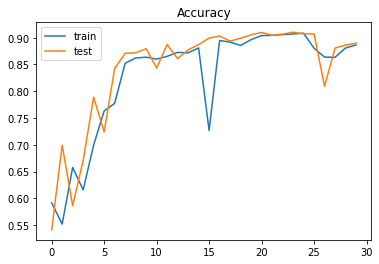

In [40]:
lsrn = Sequential()

# Adding first LSTM layer and some Dropout regularisation
lsrn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_train.shape[1], 1)))
lsrn.add(Dropout(0.2))

# Adding second LSTM layer nd some Dropout regularisation
lsrn.add(LSTM(units = 45, return_sequences = True,))
lsrn.add(Dropout(0.2))

# Adding third LSTM layer and some Dropout regularisation
lsrn.add(LSTM(units = 45, return_sequences = True))
lsrn.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
lsrn.add(LSTM(units = 45))
lsrn.add(Dropout(0.2))

# Adding the output layer
lsrn.add(Dense(units = 16))

# Compiling the RNN
lsrn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Fitting the RNN to the Training set
history = lsrn.fit(x_train, y_train, epochs = 30 , batch_size = 6000,validation_split=0.2)

x_test = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1],1))

# predicting target attribute on testing dataset
test_results = lsrn.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# predict probabilities for test set
y_probs = lsrn.predict(x_test, verbose=0)
# predict classes for test set 
y_classes = np.argmax(y_probs,axis=1)

# reduce to 1d array
y_probs = y_probs[:, 0]


p = precision_score(ytest, y_classes, average = 'micro')
r = recall_score(ytest, y_classes, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('LSTM')
precision.append(p)
accuracy.append(test_results[1])
recall.append(r)
f1.append(f)

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Epoch 1/100
252/252 [==============================] - 1s 3ms/step - loss: 0.9090 - accuracy: 0.3032 - val_loss: 2.8451 - val_accuracy: 0.5593
Epoch 2/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8843 - accuracy: 0.5382 - val_loss: 2.8399 - val_accuracy: 0.5953
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 0.8828 - accuracy: 0.6267 - val_loss: 2.8386 - val_accuracy: 0.6335
Epoch 4/100
252/252 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.6668 - val_loss: 2.8381 - val_accuracy: 0.6961
Epoch 5/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8822 - accuracy: 0.6913 - val_loss: 2.8378 - val_accuracy: 0.7096
Epoch 6/100
252/252 [==============================] - 1s 2ms/step - loss: 0.8820 - accuracy: 0.6910 - val_loss: 2.8376 - val_accuracy: 0.7033
Epoch 7/100
252/252 [==============================] - 0s 2ms/step - loss: 0.8817 - accuracy: 0.6964 - val_loss: 2.8375 - val_accuracy: 0.7159

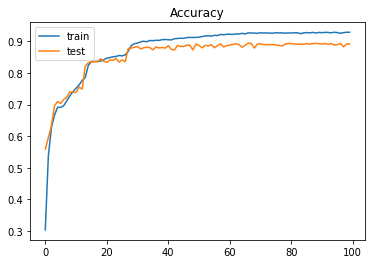

In [42]:
from keras.layers import Input
from keras.models import Model
X_train = Xtrain
y_train = ytrain
X_test = Xtest
y_test = ytest


input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

# training the model on training dataset
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# predict probabilities for test set
y_probs = autoencoder.predict(x_test, verbose=0)
# predict crisp classes for test set 
y_classes = np.argmax(y_probs,axis=1)

# reduce to 1d array
y_probs = y_probs[:, 0]


p = precision_score(ytest, y_classes, average = 'micro')
r = recall_score(ytest, y_classes, average = 'micro')
f = ((2*(p*r))/(p+r))
model.append('AutoEncoder')
precision.append(test_results[1])
accuracy.append(test_results[1])
recall.append(test_results[1])
f1.append(test_results[1])

plt.title('Accuracy')
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [43]:
d = {'Algorithm':model, 'Accuracy Score':accuracy, 'Precision Score':precision, 'Recall Score':recall, 'f1_score':f1}
df=pd.DataFrame(d)
df.set_index('Algorithm',inplace=True)
df

,Accuracy Score,Precision Score,Recall Score,f1_score
Algorithm,,,,
DecisionTree,0.757630,0.757630,0.757630,0.757630
RandomForest,0.752883,0.752883,0.752883,0.752883
GradientBoosting,0.767344,0.767344,0.767344,0.767344
Naive Bayes,0.616616,0.616616,0.616616,0.616616
Ensemble Model,0.760513,0.760513,0.760513,0.760513
MLP,0.759759,0.759759,0.759759,0.759759
LSTM,0.725559,0.725559,0.725559,0.725559
AutoEncoder,0.892255,0.892255,0.892255,0.892255


In [47]:
df2 = df
for column in df2:
    df2[column] *= 100 
df2

,Accuracy Score,Precision Score,Recall Score,f1_score
Algorithm,,,,
DecisionTree,75.762952,75.762952,75.762952,75.762952
RandomForest,75.288325,75.288325,75.288325,75.288325
GradientBoosting,76.734386,76.734386,76.734386,76.734386
Naive Bayes,61.661639,61.661639,61.661639,61.661639
Ensemble Model,76.051278,76.051278,76.051278,76.051278
MLP,75.975871,75.975869,75.975869,75.975869
LSTM,72.555894,72.555891,72.555891,72.555891
AutoEncoder,89.225513,89.225513,89.225513,89.225513


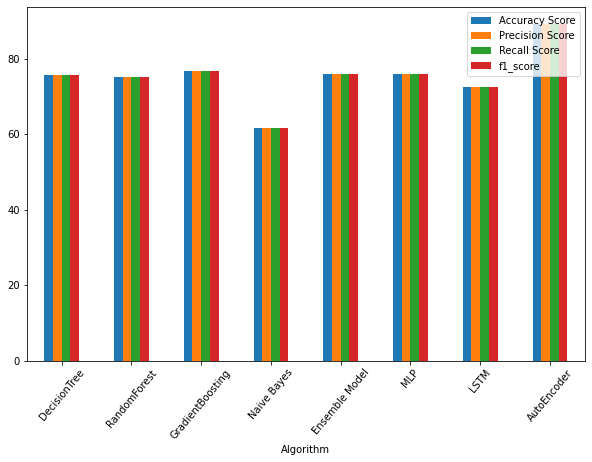

In [48]:
plt.rcParams["figure.figsize"] = [10, 6.5]
df2.plot.bar()
plt.xticks(rotation=50)
plt.show()

In [49]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              43008     
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
Total params: 356,880
Trainable params: 356,880
Non-trainable params: 0
_________________________________________________________________


In [50]:
lsrn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 41, 45)            8460      
                                                                 
 dropout (Dropout)           (None, 41, 45)            0         
                                                                 
 lstm_1 (LSTM)               (None, 41, 45)            16380     
                                                                 
 dropout_1 (Dropout)         (None, 41, 45)            0         
                                                                 
 lstm_2 (LSTM)               (None, 41, 45)            16380     
                                                                 
 dropout_2 (Dropout)         (None, 41, 45)            0         
                                                                 
 lstm_3 (LSTM)               (None, 45)               

In [51]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_6 (Dense)             (None, 50)                2100      
                                                                 
 dense_7 (Dense)             (None, 41)                2091      
                                                                 
Total params: 4,191
Trainable params: 4,191
Non-trainable params: 0
_________________________________________________________________
